In [50]:
pip install pycaret

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Import pycaret

In [7]:
from pycaret.regression import *

In [11]:
s = setup(housing, target='median_house_value', session_id = 0, encoding_method='category-encoders')

,Description,Value
0,Session id,0
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(20640, 10)"
4,Transformed data shape,"(20640, 14)"
5,Transformed train set shape,"(14447, 14)"
6,Transformed test set shape,"(6193, 14)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,1.0%


In [12]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32120.5163,2284212986.3596,47763.5213,0.8281,0.2362,0.1798,0.4520
rf,Random Forest Regressor,32328.9060,2437275120.2198,49317.1610,0.8167,0.2384,0.1797,0.7810
et,Extra Trees Regressor,34687.5805,2704871940.3128,51974.7821,0.7964,0.2489,0.1925,0.3600
gbr,Gradient Boosting Regressor,38270.0614,3006328829.3996,54800.0398,0.7737,0.2689,0.2147,0.2810
lr,Linear Regression,50018.1795,4726473611.0418,68702.9268,0.6441,0.3803,0.2883,0.2090
lasso,Lasso Regression,50018.5119,4726491696.7918,68703.0982,0.6441,0.3804,0.2883,0.0400
ridge,Ridge Regression,50017.5642,4726616941.1872,68704.1052,0.6441,0.3808,0.2883,0.0140
llar,Lasso Least Angle Regression,50018.4817,4726491759.4078,68703.1001,0.6441,0.3805,0.2883,0.0130
br,Bayesian Ridge,50028.4384,4727990371.1129,68713.7947,0.6440,0.3835,0.2884,0.0140
lar,Least Angle Regression,49987.7849,4766229039.4373,68993.7679,0.6412,0.3818,0.2861,0.0140


In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

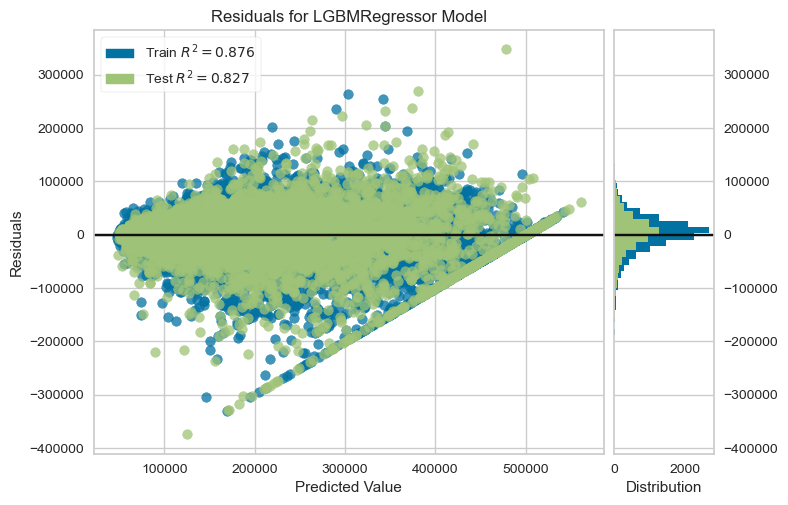

In [19]:
plot_model(best, plot='residuals')

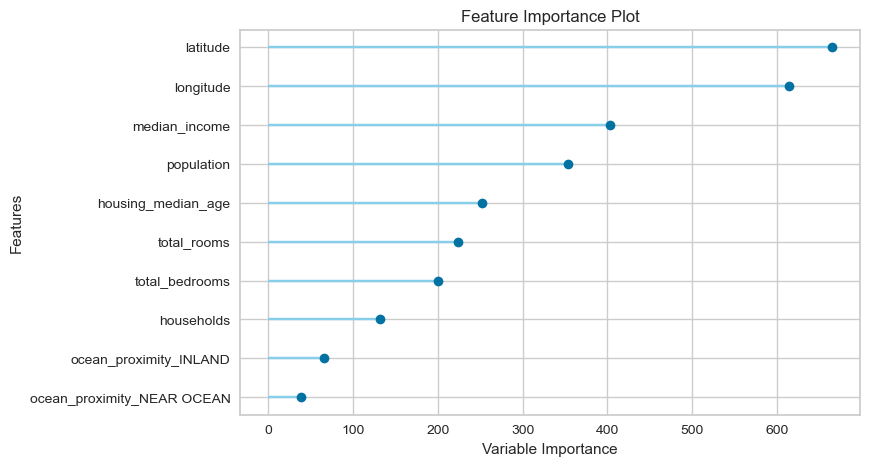

In [20]:
plot_model(best, plot = 'feature')

In [14]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,32153.6375,2309505754.8570,48057.3174,0.8268,0.2380,0.1826


## Save model

In [21]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/6f/6_lc9cgj1_qgzwkbr1txp5j00000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['longitude', 'latitude',
                                              'housing_median_age',
                                              'total_rooms', 'total_bedrooms',
                                              'population', 'households',
                                              'median_income'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['ocean_proximity'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['ocean_proximity'],
                                     transformer=OneHotEncoder(cols=['ocean_proximity'],
                                                   

## Load model

In [22]:
#loaded_model = load_model('best_model')

In [36]:
lightgbm = create_model('lightgbm')
rf = create_model('rf')
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31127.1983,2207099171.0804,46979.7741,0.8323,0.2307,0.1736
1,32665.3660,2348068199.6211,48456.8695,0.8271,0.2383,0.1818
2,31836.5209,2255999855.2360,47497.3668,0.8343,0.2317,0.1729
3,32554.3461,2529286241.3216,50292.0097,0.8121,0.2335,0.1752
4,32842.9880,2369789055.7137,48680.4792,0.8314,0.2414,0.1844
5,32414.6981,2350410575.3524,48481.0332,0.8271,0.2475,0.1901
6,31189.8781,2105435565.1690,45885.0255,0.8310,0.2227,0.1666
7,32826.5366,2320812115.4474,48174.8079,0.8247,0.2515,0.1967
8,33150.2426,2417396260.3120,49167.0241,0.8060,0.2408,0.1830


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32071.9114,2458616969.7159,49584.4428,0.8132,0.2407,0.1800
1,33456.7901,2669006464.9097,51662.4280,0.8035,0.2455,0.1850
2,32091.5747,2339099134.3797,48364.2340,0.8282,0.2303,0.1715
3,33033.1330,2733706187.0626,52284.8562,0.7969,0.2380,0.1754
4,32763.8148,2507471697.5056,50074.6612,0.8216,0.2472,0.1875
5,32902.1205,2565069574.0066,50646.5159,0.8113,0.2531,0.1917
6,31254.0773,2192486924.6235,46823.9995,0.8240,0.2191,0.1648
7,32445.9066,2424949600.9111,49243.7773,0.8168,0.2492,0.1900
8,32985.5043,2528363037.0377,50282.8304,0.7971,0.2411,0.1808


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34004.6621,2628217428.5609,51266.1431,0.8003,0.2484,0.1916
1,35296.3954,2809588931.3503,53005.5557,0.7932,0.2508,0.1946
2,33747.4503,2588874009.0212,50880.9789,0.8099,0.2389,0.1804
3,36177.1262,3109912020.9803,55766.5852,0.7689,0.2520,0.1903
4,35276.6112,2752241965.5427,52461.8144,0.8042,0.2526,0.1976
5,35049.3630,2740827192.4692,52352.9101,0.7984,0.2624,0.2059
6,33419.9867,2481239635.3773,49812.0431,0.8008,0.2338,0.1785
7,34836.3399,2701536809.9820,51976.3101,0.7959,0.2590,0.2027
8,35940.9861,2860664309.2424,53485.1784,0.7704,0.2539,0.1978


## Tune model

In [37]:
#tuned_model = tune_model(best, n_iter = 20, optimize = 'MAE')

## Blending model

In [38]:
blend1 = blend_models(estimator_list = [lightgbm, rf, et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31278.4883,2283857276.5786,47789.7194,0.8264,0.2332,0.1762
1,32765.9294,2451850991.8735,49516.1690,0.8195,0.2379,0.1818
2,31557.5054,2240192374.3935,47330.6705,0.8355,0.2260,0.1696
3,32776.2099,2629539746.8459,51279.0381,0.8046,0.2345,0.1745
4,32523.1901,2389965555.4499,48887.2740,0.8300,0.2407,0.1843
5,32429.0577,2412853199.3810,49120.8021,0.8225,0.2484,0.1909
6,30736.5536,2109948030.8469,45934.1706,0.8306,0.2182,0.1639
7,32240.1149,2326348088.1625,48232.2308,0.8243,0.2470,0.1909
8,32947.5866,2428468301.6774,49279.4917,0.8051,0.2381,0.1820


In [39]:
blender2 = blend_models([lightgbm, rf, et], fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32163.7600,2401232176.2063,49002.3691,0.8204,0.2355,0.1786
1,32462.1809,2499696288.0099,49996.9628,0.8154,0.2319,0.1723
2,32939.5600,2453643176.3445,49534.2627,0.8227,0.2475,0.1910
3,31828.6117,2236270551.2588,47289.2224,0.8259,0.2351,0.1800
4,31911.3817,2220565914.0215,47122.8810,0.8283,0.2313,0.1786
Mean,32261.0989,2362281621.1682,48589.1396,0.8225,0.2363,0.1801
Std,404.8618,113762033.6993,1173.5145,0.0044,0.0059,0.0061


In [40]:
blender3 = blend_models(compare_models(n_select = 3))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32120.5163,2284212986.3596,47763.5213,0.8281,0.2362,0.1798,0.0210
rf,Random Forest Regressor,32328.9060,2437275120.2198,49317.1610,0.8167,0.2384,0.1797,0.0890
et,Extra Trees Regressor,34687.5805,2704871940.3128,51974.7821,0.7964,0.2489,0.1925,0.1120
gbr,Gradient Boosting Regressor,38270.0614,3006328829.3996,54800.0398,0.7737,0.2689,0.2147,0.0240
lr,Linear Regression,50018.1795,4726473611.0418,68702.9268,0.6441,0.3803,0.2883,0.0240
lasso,Lasso Regression,50018.5119,4726491696.7918,68703.0982,0.6441,0.3804,0.2883,0.0200
ridge,Ridge Regression,50017.5642,4726616941.1872,68704.1052,0.6441,0.3808,0.2883,0.0210
llar,Lasso Least Angle Regression,50018.4817,4726491759.4078,68703.1001,0.6441,0.3805,0.2883,0.0220
br,Bayesian Ridge,50028.4384,4727990371.1129,68713.7947,0.6440,0.3835,0.2884,0.0250
lar,Least Angle Regression,49987.7849,4766229039.4373,68993.7679,0.6412,0.3818,0.2861,0.0200


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31278.4883,2283857276.5786,47789.7194,0.8264,0.2332,0.1762
1,32765.9294,2451850991.8735,49516.1690,0.8195,0.2379,0.1818
2,31557.5054,2240192374.3935,47330.6705,0.8355,0.2260,0.1696
3,32776.2099,2629539746.8459,51279.0381,0.8046,0.2345,0.1745
4,32523.1901,2389965555.4499,48887.2740,0.8300,0.2407,0.1843
5,32429.0577,2412853199.3810,49120.8021,0.8225,0.2484,0.1909
6,30736.5536,2109948030.8469,45934.1706,0.8306,0.2182,0.1639
7,32240.1149,2326348088.1625,48232.2308,0.8243,0.2470,0.1909
8,32947.5866,2428468301.6774,49279.4917,0.8051,0.2381,0.1820


In [41]:
#blender = blend_models(compare_models(n_select = 3), weights = [0.5,0.2,0.3]) #choose_better = True
#tuned_blender = tune_model(blender)

## Ensemble model

In [44]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44300.5336,4835703948.6997,69539.2260,0.6325,0.3226,0.2399
1,43980.5273,4371836969.4547,66119.8682,0.6781,0.3212,0.2393
2,44609.5211,4970837325.8533,70504.1653,0.6349,0.3299,0.2379
3,46464.5419,5339783191.3239,73073.8202,0.6033,0.3338,0.2425
4,44125.2318,5048745434.2284,71054.5244,0.6409,0.3337,0.2585
5,44942.0478,5100129862.4630,71415.1935,0.6248,0.3407,0.2551
6,44886.5363,4903190598.2318,70022.7863,0.6064,0.3291,0.2373
7,44315.2078,4766233548.5180,69037.9138,0.6399,0.3295,0.2477
8,44530.9197,4864306816.7922,69744.5827,0.6096,0.3234,0.2386


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33725.7615,2656405272.2928,51540.3267,0.7981,0.2497,0.1890
1,35259.9808,2923652229.2597,54070.8076,0.7848,0.2558,0.1938
2,34137.5312,2645604726.9708,51435.4423,0.8057,0.2454,0.1833
3,34688.5849,2956140904.5506,54370.4047,0.7804,0.2484,0.1841
4,34881.1548,2787244897.7147,52794.3643,0.8017,0.2630,0.2033
5,34385.2758,2810412920.4243,53013.3278,0.7932,0.2620,0.1991
6,32825.1044,2442319875.7983,49419.8328,0.8039,0.2324,0.1744
7,33905.7230,2590351552.1125,50895.4964,0.8043,0.2579,0.1991
8,34821.5141,2776518973.2878,52692.6842,0.7772,0.2517,0.1886


In [49]:
ensembled_model1 = ensemble_model(dt) #Bagging

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33725.7615,2656405272.2928,51540.3267,0.7981,0.2497,0.1890
1,35259.9808,2923652229.2597,54070.8076,0.7848,0.2558,0.1938
2,34137.5312,2645604726.9708,51435.4423,0.8057,0.2454,0.1833
3,34688.5849,2956140904.5506,54370.4047,0.7804,0.2484,0.1841
4,34881.1548,2787244897.7147,52794.3643,0.8017,0.2630,0.2033
5,34385.2758,2810412920.4243,53013.3278,0.7932,0.2620,0.1991
6,32825.1044,2442319875.7983,49419.8328,0.8039,0.2324,0.1744
7,33905.7230,2590351552.1125,50895.4964,0.8043,0.2579,0.1991
8,34821.5141,2776518973.2878,52692.6842,0.7772,0.2517,0.1886


In [48]:
ensembled_model2 = ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34320.7218,2954485635.3239,54355.1804,0.7755,0.2574,0.1859
1,35070.2090,3076803829.5170,55468.9447,0.7735,0.2583,0.1831
2,33532.0007,2781093670.6166,52736.0756,0.7958,0.2487,0.1749
3,34189.3059,3129902211.7972,55945.5290,0.7675,0.2554,0.1785
4,33470.9661,2753162455.1183,52470.5866,0.8042,0.2541,0.1821
5,33963.8374,2989587432.2803,54677.1198,0.7801,0.2678,0.1904
6,33049.8512,2682646678.2249,51794.2726,0.7846,0.2385,0.1678
7,34406.8130,2926545686.3144,54097.5571,0.7789,0.2619,0.1916
8,34743.2375,2931933543.2375,54147.3318,0.7647,0.2543,0.1827
